In [511]:
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict 
import random
import time
import math

In [512]:
# Preprocessing 
data = pd.read_table("BIOGRID-ORGANISM-Zea_mays-3.5.182.tab2.txt", low_memory = False)
# Extract interactions
val = data.copy()
val.set_index("Experimental System Type", inplace = True)
val = val.filter(items = ["Official Symbol Interactor A", "Official Symbol Interactor B", "Pubmed ID"])
val = val.filter(like = "genetic", axis = 0)
# graph = nx.from_pandas_edgelist(val, "Official Symbol Interactor A", "Official Symbol Interactor B", create_using=nx.DiGraph)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [532]:
# Helper functions
def subgraphs_n(graph):
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    subgraphs_n = defaultdict(list)
    for subgraph in subgraphs:
        subgraphs_n[nx.number_of_nodes(subgraph)].append(subgraph)
    return subgraphs_n

def attributes(x):
    """
    Returns [number of source nodes, number of outgoing edges per node...]
    which is equivalent to d(x, 0) for connectivity matrix x
    
    x is a pandas dataframe
    """
    n = len(x)
    
    # Initialize with counter of source nodes
    result = [0]
    
    # Increment counter for number of source nodes
    for j in range(n):
        for i in range(n):
            if x.iloc[i,j] != 0:
                break
            elif i == n - 1:
                result[0] += 1
    result[0] = str(result[0])
    # Append sorted list of number of outgoing edges per node
    result.extend(sorted([str(int(sum(x.iloc[i]))) for i in range(n)]))
    result_string = "".join(result)
    return result_string

def subgraph_hash(subgraphs_n, n, r):
    """
    n is size of subgraph
    r is measurement of similarity (in paper)
    """
    start_time = time.time()
    random.seed(24)
    positions = sorted(random.sample(range(n + 1), n + 1 - r))
#     print(positions)
    table = defaultdict(list)
    for subgraph in subgraphs_n[n]:
        characteristics = attributes(nx.to_pandas_adjacency(subgraph))
        hash_key = []
        for p in positions:
            hash_key.append(characteristics[p])
        hash_key_string = "".join(hash_key)
        table[hash_key_string].append(subgraph)
    print(str(n) + ": " + str(time.time() - start_time))
def total_hash(graph, n, r):
    sgn = subgraphs_n(graph)
    print(len(sgn[3]), len(sgn[4]), len(sgn[5]), len(sgn[6]))
    subgraph_hash(sgn, n, r)
#     print(table)    

In [533]:
def subgraphs_n_uniform(graph):
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    subgraphs_n = defaultdict(list)
    for subgraph in subgraphs:
        subgraphs_n[nx.number_of_nodes(subgraph)].append(subgraph)
    count = min(len(subgraphs_n[3]), len(subgraphs_n[4]), len(subgraphs_n[5]), len(subgraphs_n[6]))
    for i in range(3, 7):
        subgraphs_n[i] = random.sample(subgraphs_n[i], count)
    return subgraphs_n
def total_hash_uniform(graph, n, r):
    sgn = subgraphs_n_uniform(graph)
    print(len(sgn[3]), len(sgn[4]), len(sgn[5]), len(sgn[6]))
    subgraph_hash(sgn, n, r)

In [534]:
random.seed(24)
# Generate graph
graph = nx.fast_gnp_random_graph(100000, 0.000003, seed=24, directed=True)
# Size of motif
for n in range(3, 7):
    total_hash_uniform(graph, n, int(math.ceil(n*1.0/2)))


395 395 395 395
3: 0.5374109745025635
395 395 395 395
4: 0.6214439868927002
395 395 395 395
5: 0.6779100894927979
395 395 395 395
6: 0.8459410667419434


In [535]:
graph = nx.fast_gnp_random_graph(1000000, 0.00000035, seed=24, directed=True)
# print(sorted(subgraphs_n(graph).keys()))
# sgn = subgraphs_n(graph)
# print(len(sgn[3]), len(sgn[4]), len(sgn[5]), len(sgn[6]))
for n in range(3, 7):
    total_hash_uniform(graph, n, int(math.ceil(n*1.0/2)))

4514 4514 4514 4514
3: 5.435842752456665
4514 4514 4514 4514
4: 7.315407991409302
4514 4514 4514 4514
5: 8.144726991653442
4514 4514 4514 4514
6: 8.901112079620361


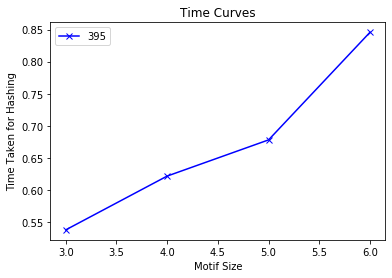

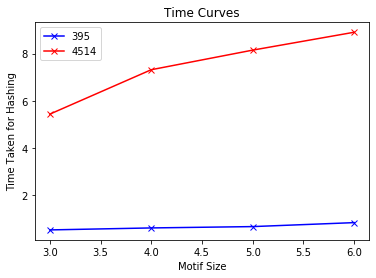

In [543]:
import matplotlib.pyplot as plt
def time_curve(times, sizes):            
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    plt.figure()
    for i in range(len(sizes)):
        plt.plot([3, 4, 5, 6], times[i], colors[i], marker = "x")
    plt.title("Time Curves")
    plt.xlabel("Motif Size")
    plt.ylabel("Time Taken for Hashing")
    plt.legend(sizes, loc="upper left")
    plt.show()
time_curve([[0.5374, 0.6214, 0.6779, 0.8459]], [395])
time_curve([[0.5374, 0.6214, 0.6779, 0.8459], [5.4358, 7.3154, 8.1447, 8.9011]], [395, 4514])